### Additive vs Multiplicative models

 1. Additive:  `xt = Trend + Seasonal + Random`
 2. Multiplicative:  `xt = Trend * Seasonal * Random`

Multiplicative models may be more suitable where the scale of the seasonal fluctuations varies with time.

More info: https://newonlinecourses.science.psu.edu/stat510/node/69/


Let's see how the flight data varies ...

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

flights = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')

In [16]:
# see notebook acf_trend_and_seasonal.ipynb for step-by-step data clensing

flights['day'] = '01'
flights['year'] = flights['year'].astype(str)
flights['date'] = flights[['year', 'month', 'day']].apply(lambda x: '-'.join(x), axis=1)
flights = flights.set_index( pd.to_datetime( flights['date']) )

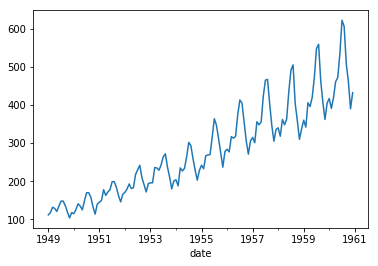

In [17]:
_ = flights['passengers'].plot()

It looks like the magnitude of seasonal variation is dependent on the date, thus a multiplicative model may be more appropriate for this dataset

### Seasonal Decomposition

What affect does the additive/multiplicative model param have on the seasonal decomposition? See below ..

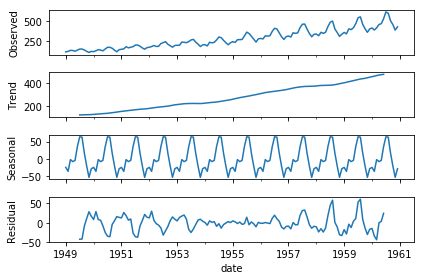

In [3]:
decomposition = sm.tsa.seasonal_decompose(flights['passengers'], model='additive')
fig = decomposition.plot()
plt.show()

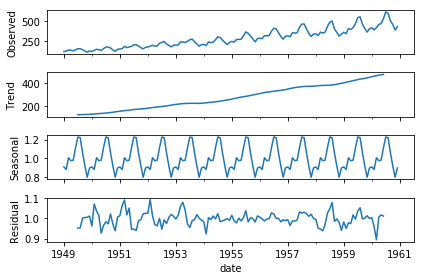

In [4]:
decomposition = sm.tsa.seasonal_decompose(flights['passengers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

### Different magnitude of variation in peaks and troughs

**NOTE:** The additive model may not be appropriate for a dataset with different magnitudes of variation around the peaks and troughs.

Even if the flights data didn't have a seasonal component, it still has irregular fluctuations in the size of the variation between the peaks and the troughs.  The troughs seem to vary more than the peaks - see below.

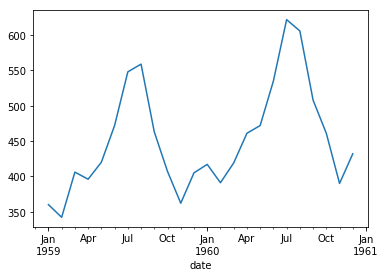

In [13]:
_ = flights['1959' : '1960']['passengers'].plot()